<a href="https://colab.research.google.com/github/eichaui/PYTHON/blob/main/RAMDOMFORESTYarboldedecisiontesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALGORITMO RAMDOM FOREST PARA SOMNOLENCIA 

SOMNOLENCIA 1 
VIGILA 0 

atencion theta low alpha high alpha low betha high beta low gamm medd gamma etiqueta

In [ ]:
import pandas as pd 
import numpy as np 
import math as ma
from matplotlib import pyplot as pyplot
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline


In [ ]:
df=pd.read_csv('DFILTRADO11.csv', sep=',' , header=None)


In [ ]:
df.head()



,0,1,2,3,4,5,6,7,8
0,55.048055,35476.30533,13696.12063,10444.592350,10743.448190,7860.708075,6686.600850,5257.460935,1
1,53.386074,34761.93364,12872.80222,8348.245505,7835.438705,6198.498856,4709.672769,4514.000000,1
2,52.091206,34725.81661,14417.72965,10646.404710,5575.319712,5374.288656,4889.281465,4733.869565,1
3,52.170644,35338.57077,14565.20497,11390.213140,3569.378882,5738.254658,5078.126185,5483.370709,1
4,53.060150,33558.34946,13039.00458,12004.969600,2322.362864,5670.543642,5233.664596,5501.399477,1


In [ ]:
from pandas.core.strings.accessor import F


<ipython-input-29-78d80065103e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:, 1])


<Axes: xlabel='1', ylabel='Density'>

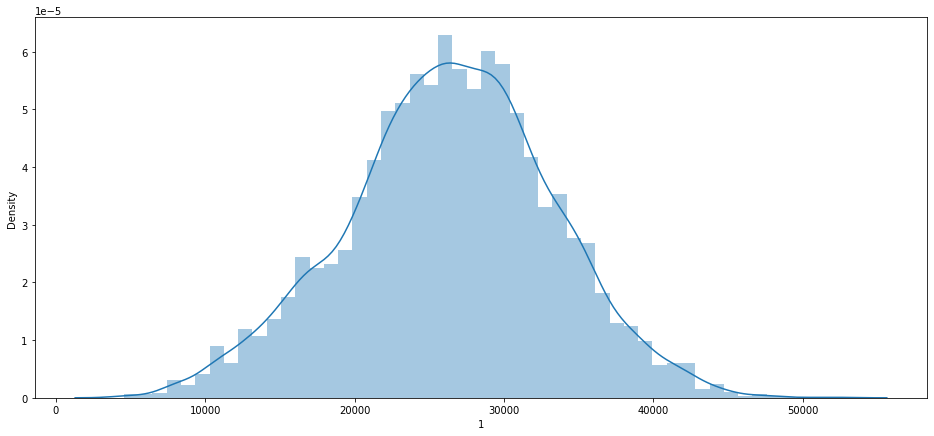

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
sns.distplot(df.iloc[:, 1])

<ipython-input-30-dc62a12700d7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df.iloc[:,1]))


<Axes: xlabel='1', ylabel='Density'>

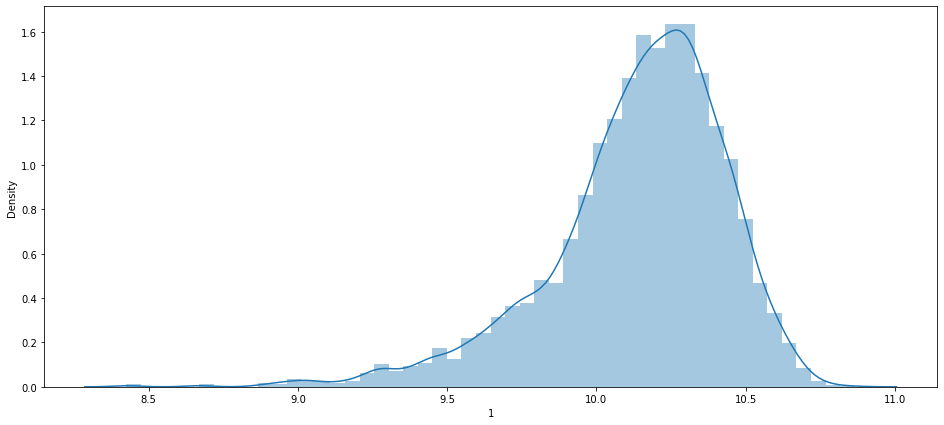

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
sns.distplot(np.log1p(df.iloc[:,1]))

VALORES SIN NORMALIZAR

In [ ]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X.head()


,0,1,2,3,4,5,6,7
0,55.048055,35476.30533,13696.12063,10444.592350,10743.448190,7860.708075,6686.600850,5257.460935
1,53.386074,34761.93364,12872.80222,8348.245505,7835.438705,6198.498856,4709.672769,4514.000000
2,52.091206,34725.81661,14417.72965,10646.404710,5575.319712,5374.288656,4889.281465,4733.869565
3,52.170644,35338.57077,14565.20497,11390.213140,3569.378882,5738.254658,5078.126185,5483.370709
4,53.060150,33558.34946,13039.00458,12004.969600,2322.362864,5670.543642,5233.664596,5501.399477


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10634    0
10635    0
10636    0
10637    0
10638    0
Name: 8, Length: 10639, dtype: int64

VALORES NORMALIZADOS 

In [ ]:
X_norm= np.log1p(df.iloc[:,:-1])



/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [ ]:
X_norm.head()


,0,1,2,3,4,5,6,7
0,4.026209,10.476648,9.524941,9.253935,9.282144,8.969759,8.808010,8.567594
1,3.996108,10.456307,9.462950,9.029926,8.966540,8.732224,8.457586,8.415160
2,3.972011,10.455267,9.576283,9.273071,8.626284,8.589568,8.495005,8.462709
3,3.973506,10.472759,9.586459,9.340598,8.180427,8.655085,8.532895,8.609658
4,3.990097,10.421071,9.475777,9.393159,7.750771,8.643217,8.563058,8.612940


In [ ]:
ceros= y[y==0].count()
unos= y[y==1].count()

In [ ]:
ceros ,unos 

(5529, 5110)

<ipython-input-45-fde88c57c3b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='8', ylabel='Density'>

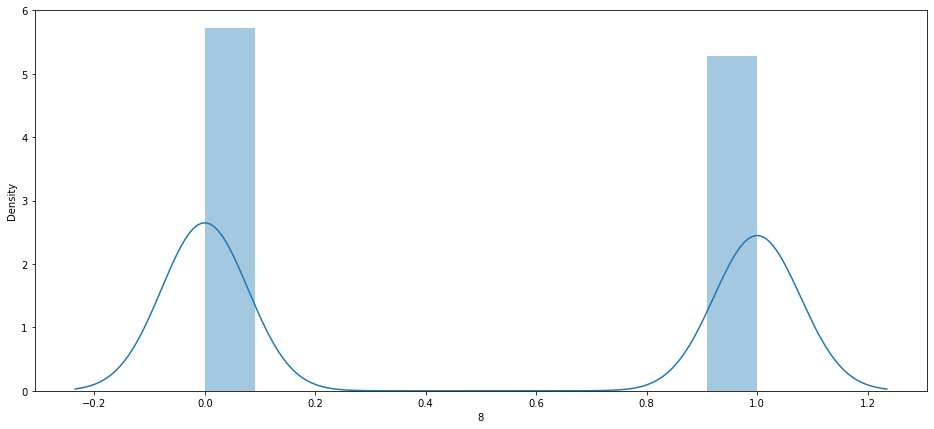

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
sns.distplot(y)

separar conjunto de entranamiento y datos de test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=1)

In [ ]:
X_train.head()


,0,1,2,3,4,5,6,7
8655,45.735534,23588.71984,10435.735860,11203.50539,6458.412226,5578.660020,3791.461916,3786.232756
651,66.667538,31982.15103,11203.910430,11778.58745,8045.211507,7701.013730,7785.929716,7964.025825
5322,35.847663,38841.13338,24703.664270,27233.02419,21712.355340,8782.206930,7729.013076,5286.973848
9550,49.110494,27767.64367,12848.575680,15392.24354,8030.069958,9243.143511,5567.637136,4332.192220
2820,44.104936,10431.10592,9241.781301,16642.10559,3928.510951,3832.421706,1971.435436,1794.454397


CLASIFICADOR CON ARBOLES DE DECISION 


In [ ]:
from sklearn.tree import DecisionTreeClassifier

en la siguiente linea de codigo se modifican parametros del arbol de decision 
estado aleatorio , la produndidad

In [ ]:
model= DecisionTreeClassifier(random_state=1,)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_prds=model.predict(X_test)

comprobacion de datos reales con el test d prediccion 

In [ ]:
comp=pd.DataFrame({'real':y_test, 'prediccion':y_prds}) 

In [ ]:
comp.head(10)  

,real,prediccion
8976,0,0
9485,0,0
10169,0,0
4774,1,1
4908,1,1
4850,1,1
9798,0,0
7777,0,0
9743,0,0
2028,1,1


test de presicion porcentaje de acierto

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(y_test, y_prds)

In [ ]:
acc

0.9558270676691729

MATRIZ DE CONFUSION

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
cm= confusion_matrix(y_test, y_prds)

en el test el  # 34 dice que son 1 por tanto son errados porque son 0 
de igual manera el valor de 107 dice que son 0 
es el porcentaje de error 

In [ ]:
cm

array([[1498,  137],
       [ 508, 1049]])

GRAFICA **Display** matriz de confusion 

In [ ]:
clf = DecisionTreeClassifier(random_state=1)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
cm = confusion_matrix(y_test, y_prds, labels=clf.classes_)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

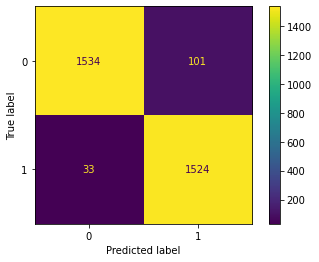

In [ ]:
 disp.plot()
 plt.show()

USO DE RAMDOM FOREST OPTIMIZADO POR BUSQUEDA POR MALLA 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parametros= [{'max_depth':[None, 3,4,5],
              'max_features': [0.9,1],
              'min_samples_split':[0.7,0.8,0.95]}]

In [ ]:
gs= GridSearchCV(cv=5, scoring='accuracy', estimator=DecisionTreeClassifier(),n_jobs=-1, param_grid=parametros)

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [None, 3, 4, 5],
                          'max_features': [0.9, 1],
                          'min_samples_split': [0.7, 0.8, 0.95]}],
             scoring='accuracy')

In [ ]:
gs.best_estimator_


DecisionTreeClassifier(max_features=0.9, min_samples_split=0.7)

In [ ]:
gs.best_params_


{'max_depth': None, 'max_features': 0.9, 'min_samples_split': 0.7}

In [ ]:
y_prds=gs.best_estimator_.predict(X_test)

In [ ]:
comp=pd.DataFrame({'real':y_test, 'prediccion':y_prds})

In [ ]:
comp.head(10)

,real,prediccion
8976,0,0
9485,0,0
10169,0,0
4774,1,0
4908,1,1
4850,1,1
9798,0,0
7777,0,1
9743,0,0
2028,1,1


In [ ]:
accuracy_score(y_test, y_prds)

0.7290100250626567

In [ ]:
modelo_final = gs.best_estimator_

In [ ]:
print(f"Profundidad del árbol: {modelo_final.get_depth()}")

Profundidad del árbol: 2


In [ ]:
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")


Número de nodos terminales: 3


RAMDOM FOREST ENSABLET MODEL

In [261]:
import pandas as pd 
import numpy as np 
import math as ma
from matplotlib import pyplot as pyplot
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [251]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
rf= RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)

In [253]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [254]:
y_prds=rf.predict(X_test)

In [255]:
y_prds

array([0, 0, 0, ..., 1, 1, 1])

In [256]:
accuracy_score(y_test,y_prds)

0.9862155388471178

MATRIZ DE CONFUSION 

In [257]:
cm= confusion_matrix(y_test, y_prds)

In [263]:
cm

array([[1620,   15],
       [  29, 1528]])

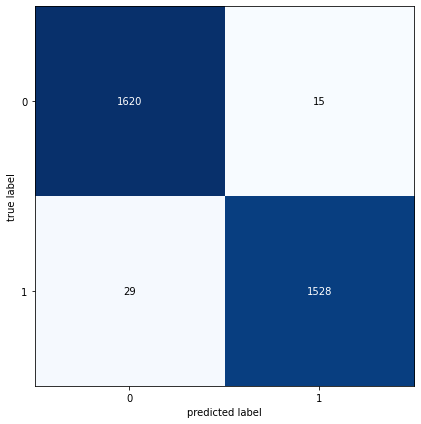

In [264]:
plot_confusion_matrix(conf_mat=cm, figsize=(6,6), show_normed=False)
plt.tight_layout()